<a href="https://colab.research.google.com/github/parthhasstartedcoding/Product-Management/blob/main/AB_Testing_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# A/B Testing Framework for Marketing Campaigns

This project analyzes the performance of two marketing campaign groups (Control and Test) to determine which variation drives better engagement in terms of 'Add to Cart' and 'Purchase' rates.
It involves data cleaning, metric computation, statistical tests, and visualizations.

## Steps
1. Data Cleaning: Handle missing values and standardize columns.
2. Key Metrics: Calculate 'Add to Cart' and 'Purchase' rates for both groups.
3. Statistical Analysis: Perform Chi-Square, T-Test, and Z-Test to evaluate differences in engagement metrics.
4. Visualizations: Create bar plots and pie charts for a clear comparison.

---


# New section

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, norm
import matplotlib.pyplot as plt

# Load the data
control_data = pd.read_csv('control_group.csv', delimiter=';')
test_data = pd.read_csv('test_group.csv', delimiter=';')

# Display the first few rows of each dataset
control_data.head(), test_data.head()

(      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
 0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
 1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
 2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
 3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
 4  Control Campaign  5.08.2019         1835               NaN       NaN   
 
    # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
 0               7016.0         2290.0             2159.0            1819.0   
 1               8110.0         2033.0             1841.0            1219.0   
 2               6508.0         1737.0             1549.0            1134.0   
 3               3065.0         1042.0              982.0            1183.0   
 4                  NaN            NaN                NaN               NaN   
 
    # of Purchase  
 0          618.0  
 1          511.0  
 2    

In [ ]:
# Impute missing values for control_data
# Select only numeric columns for median calculation
numeric_control_data = control_data.select_dtypes(include=np.number)

# Fill missing values in numeric columns with their respective medians
control_data[numeric_control_data.columns] = numeric_control_data.fillna(numeric_control_data.median())

# Verify the cleaning
control_data.info(), test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_name        30 non-null     object 
 1   date                 30 non-null     object 
 2   spend_[usd]          30 non-null     int64  
 3   #_of_impressions     30 non-null     float64
 4   reach                30 non-null     float64
 5   #_of_website_clicks  30 non-null     float64
 6   #_of_searches        30 non-null     float64
 7   #_of_view_content    30 non-null     float64
 8   #_of_add_to_cart     30 non-null     float64
 9   #_of_purchase        30 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   campaign_name        30 non-n

(None, None)

In [ ]:
print("Control Data Columns:", control_data.columns)
print("Test Data Columns:", test_data.columns)


Control Data Columns: Index(['campaign_name', 'date', 'spend_[usd]', '#_of_impressions', 'reach',
       '#_of_website_clicks', '#_of_searches', '#_of_view_content',
       '#_of_add_to_cart', '#_of_purchase'],
      dtype='object')
Test Data Columns: Index(['campaign_name', 'date', 'spend_[usd]', '#_of_impressions', 'reach',
       '#_of_website_clicks', '#_of_searches', '#_of_view_content',
       '#_of_add_to_cart', '#_of_purchase'],
      dtype='object')


In [ ]:
# Calculating conversion rates for Add to Cart and Purchase
control_add_to_cart_rate = control_data['#_of_add_to_cart'].sum() / control_data['#_of_impressions'].sum()
test_add_to_cart_rate = test_data['#_of_add_to_cart'].sum() / test_data['#_of_impressions'].sum()
control_purchase_rate = control_data['#_of_purchase'].sum() / control_data['#_of_impressions'].sum()
test_purchase_rate = test_data['#_of_purchase'].sum() / test_data['#_of_impressions'].sum()

# Summary of metrics
metrics_summary = pd.DataFrame({
    'Group': ['Control', 'Test'],
    'Add to Cart Rate': [control_add_to_cart_rate, test_add_to_cart_rate],
    'Purchase Rate': [control_purchase_rate, test_purchase_rate]
})
print(metrics_summary)


     Group  Add to Cart Rate  Purchase Rate
0  Control          0.011864       0.004760
1     Test          0.011819       0.006988


In [ ]:
# Chi-Square Test for 'Add to Cart' and 'Purchase' Events
contingency_add_to_cart = [[control_data['#_of_add_to_cart'].sum(), control_data['#_of_impressions'].sum() - control_data['#_of_add_to_cart'].sum()],
                           [test_data['#_of_add_to_cart'].sum(), test_data['#_of_impressions'].sum() - test_data['#_of_add_to_cart'].sum()]]
contingency_purchase = [[control_data['#_of_purchase'].sum(), control_data['#_of_impressions'].sum() - control_data['#_of_purchase'].sum()],
                        [test_data['#_of_purchase'].sum(), test_data['#_of_impressions'].sum() - test_data['#_of_purchase'].sum()]]

# Chi-Square Tests
chi2_add_to_cart, p_add_to_cart, _, _ = chi2_contingency(contingency_add_to_cart)
chi2_purchase, p_purchase, _, _ = chi2_contingency(contingency_purchase)

# Z-Test for Purchase Rate
control_purchase_rate = control_data['#_of_purchase'].sum() / control_data['#_of_impressions'].sum()
test_purchase_rate = test_data['#_of_purchase'].sum() / test_data['#_of_impressions'].sum()
p_pooled = (control_data['#_of_purchase'].sum() + test_data['#_of_purchase'].sum()) / (control_data['#_of_impressions'].sum() + test_data['#_of_impressions'].sum())
se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/control_data['#_of_impressions'].sum() + 1/test_data['#_of_impressions'].sum()))
z_score_purchase = (test_purchase_rate - control_purchase_rate) / se_pooled
p_val_ztest_purchase = 2 * (1 - norm.cdf(abs(z_score_purchase)))

# T-Test
purchase_data_control = control_data['#_of_purchase']
purchase_data_test = test_data['#_of_purchase']
t_stat_purchase, p_val_ttest_purchase = ttest_ind(purchase_data_control, purchase_data_test, equal_var=False)

# Results summary
test_results_summary = {
    "Chi-Square Test for Add to Cart": {"Chi-Square Statistic": chi2_add_to_cart, "P-Value": p_add_to_cart},
    "Chi-Square Test for Purchase": {"Chi-Square Statistic": chi2_purchase, "P-Value": p_purchase},
    "Z-Test for Purchase Rate": {"Z-Score": z_score_purchase, "P-Value": p_val_ztest_purchase},
    "T-Test for Purchase Rate": {"T-Statistic": t_stat_purchase, "P-Value": p_val_ttest_purchase}
}
print(test_results_summary)


{'Chi-Square Test for Add to Cart': {'Chi-Square Statistic': 0.22011306965988042, 'P-Value': 0.6389537784738248}, 'Chi-Square Test for Purchase': {'Chi-Square Statistic': 1175.0066416555876, 'P-Value': 1.6485447411639979e-257}, 'Z-Test for Purchase Rate': {'Z-Score': 34.28414411580969, 'P-Value': 0.0}, 'T-Test for Purchase Rate': {'T-Statistic': 0.01638380705469325, 'P-Value': 0.9869856534269166}}


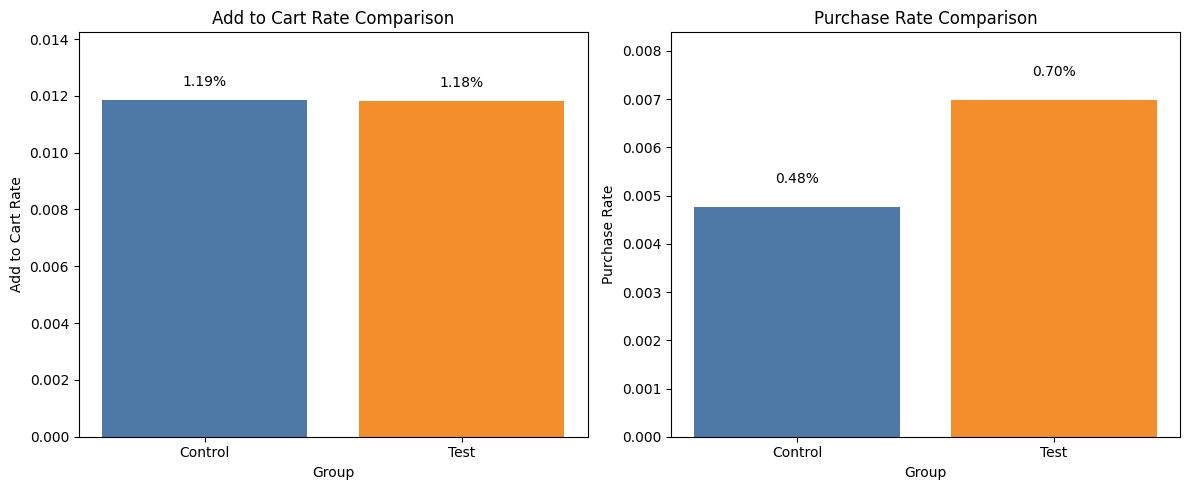

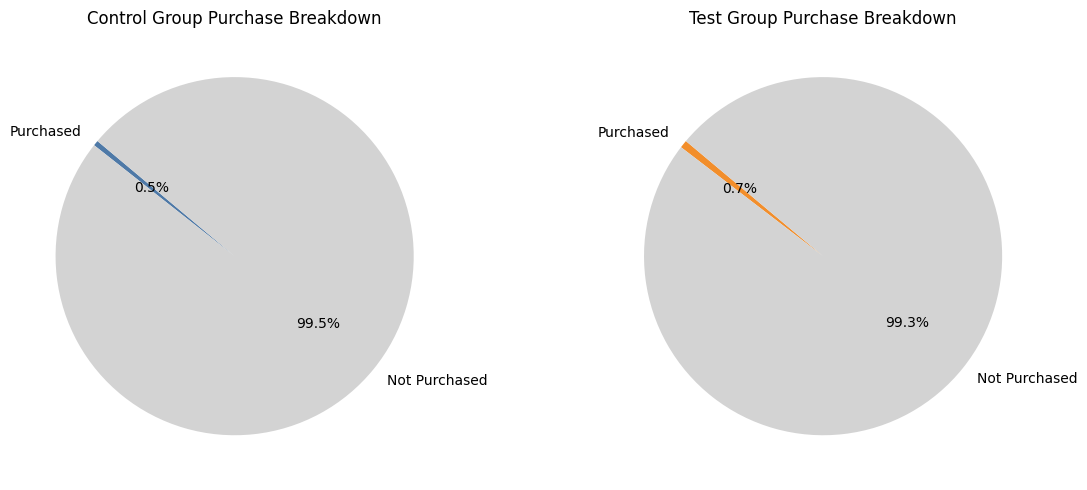

In [ ]:
# Visualization

# Professional color palette
control_color = '#4e79a7'  # muted blue
test_color = '#f28e2b'     # muted orange

# Bar Plot for Conversion Rates with adjusted limits and colors
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Add to Cart Rate comparison
ax[0].bar(metrics_summary['Group'], metrics_summary['Add to Cart Rate'], color=[control_color, test_color])
ax[0].set_title('Add to Cart Rate Comparison')
ax[0].set_xlabel('Group')
ax[0].set_ylabel('Add to Cart Rate')
ax[0].set_ylim(0, max(metrics_summary['Add to Cart Rate']) * 1.2)
for i, v in enumerate(metrics_summary['Add to Cart Rate']):
    ax[0].text(i, v + 0.0005, f"{v:.2%}", ha='center', color='black', fontsize=10)

# Purchase Rate comparison
ax[1].bar(metrics_summary['Group'], metrics_summary['Purchase Rate'], color=[control_color, test_color])
ax[1].set_title('Purchase Rate Comparison')
ax[1].set_xlabel('Group')
ax[1].set_ylabel('Purchase Rate')
ax[1].set_ylim(0, max(metrics_summary['Purchase Rate']) * 1.2)
for i, v in enumerate(metrics_summary['Purchase Rate']):
    ax[1].text(i, v + 0.0005, f"{v:.2%}", ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Pie Charts for Purchase Breakdown with professional colors and layout
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
labels = ['Purchased', 'Not Purchased']

# Control group purchase breakdown
control_purchase_counts = [control_data['#_of_purchase'].sum(), control_data['#_of_impressions'].sum() - control_data['#_of_purchase'].sum()]
ax[0].pie(control_purchase_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=[control_color, '#d3d3d3'])
ax[0].set_title("Control Group Purchase Breakdown")

# Test group purchase breakdown
test_purchase_counts = [test_data['#_of_purchase'].sum(), test_data['#_of_impressions'].sum() - test_data['#_of_purchase'].sum()]
ax[1].pie(test_purchase_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=[test_color, '#d3d3d3'])
ax[1].set_title("Test Group Purchase Breakdown")

plt.tight_layout()
plt.show()



In [ ]:
print("Control Data Columns:", control_data.columns)
print("Test Data Columns:", test_data.columns)


Control Data Columns: Index(['campaign_name', 'date', 'spend_[usd]', '#_of_impressions', 'reach',
       '#_of_website_clicks', '#_of_searches', '#_of_view_content',
       '#_of_add_to_cart', '#_of_purchase'],
      dtype='object')
Test Data Columns: Index(['campaign_name', 'date', 'spend_[usd]', '#_of_impressions', 'reach',
       '#_of_website_clicks', '#_of_searches', '#_of_view_content',
       '#_of_add_to_cart', '#_of_purchase'],
      dtype='object')


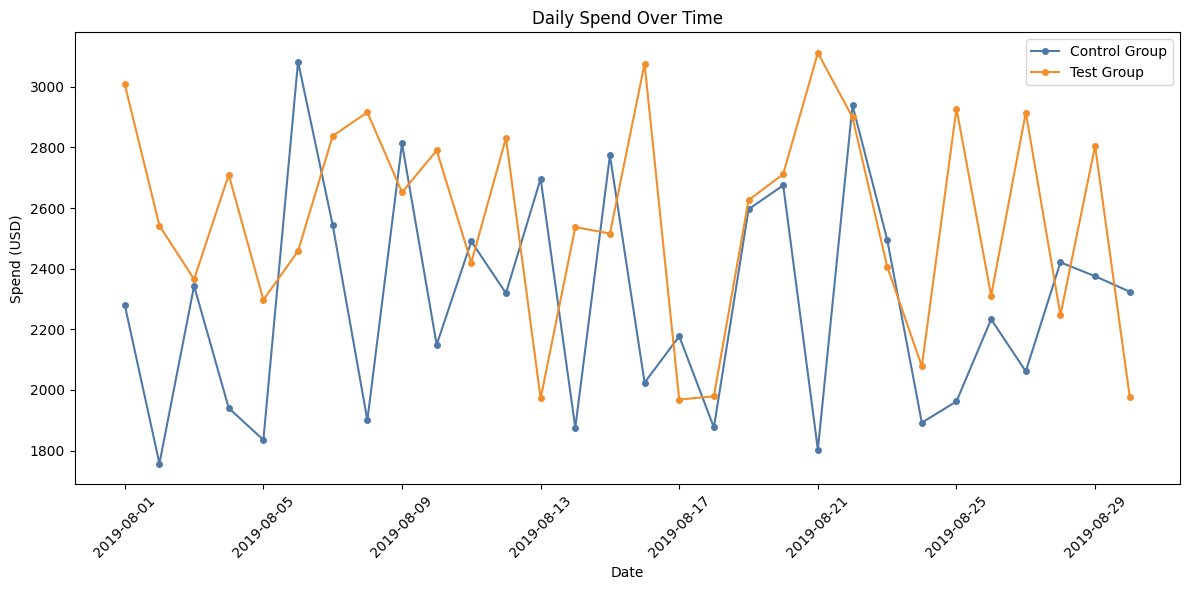

In [ ]:
# Professional color palette
control_color = '#4e79a7'  # muted blue
test_color = '#f28e2b'     # muted orange

# 1. Time Series of Spend Over Time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(control_data['date'], control_data['spend_[usd]'], label='Control Group', color=control_color, marker='o', markersize=4)
ax.plot(test_data['date'], test_data['spend_[usd]'], label='Test Group', color=test_color, marker='o', markersize=4)
ax.set_title("Daily Spend Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Spend (USD)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


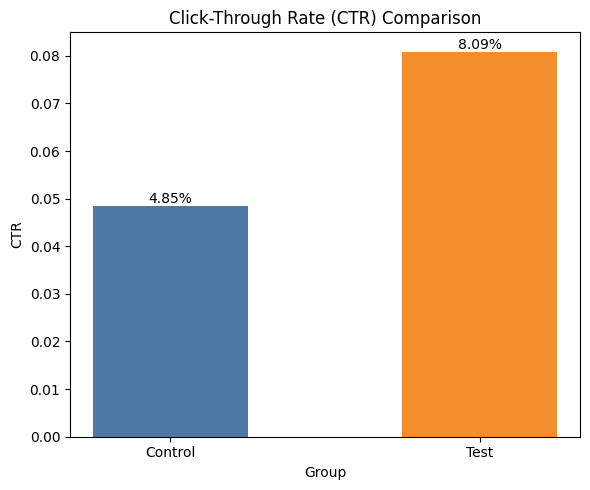

In [ ]:
# 2. CTR (Click-Through Rate) Comparison
# CTR = (Website Clicks / Impressions) for each group
control_ctr = control_data['#_of_website_clicks'].sum() / control_data['#_of_impressions'].sum()
test_ctr = test_data['#_of_website_clicks'].sum() / test_data['#_of_impressions'].sum()

# Bar plot for CTR comparison
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(['Control', 'Test'], [control_ctr, test_ctr], color=[control_color, test_color], width=0.5)
ax.set_title("Click-Through Rate (CTR) Comparison")
ax.set_xlabel("Group")
ax.set_ylabel("CTR")
for i, v in enumerate([control_ctr, test_ctr]):
    ax.text(i, v + 0.0005, f"{v:.2%}", ha='center', color='black', fontsize=10)
plt.tight_layout()
plt.show()




In [ ]:
print("Control Data Columns:", control_data.columns)
print("Test Data Columns:", test_data.columns)


Control Data Columns: Index(['campaign_name', 'date', 'spend_[usd]', '#_of_impressions', 'reach',
       '#_of_website_clicks', '#_of_searches', '#_of_view_content',
       '#_of_add_to_cart', '#_of_purchase'],
      dtype='object')
Test Data Columns: Index(['campaign_name', 'date', 'spend_[usd]', '#_of_impressions', 'reach',
       '#_of_website_clicks', '#_of_searches', '#_of_view_content',
       '#_of_add_to_cart', '#_of_purchase'],
      dtype='object')


In [ ]:
# 3. Conversion Funnel Visualization with Updated Labels
# Summing up engagement steps for each group to show drop-off rates
funnel_steps = ['Impressions', 'Website Clicks', 'View Content', 'Add to Cart', 'Purchase']
control_funnel = [control_data['#_of_impressions'].sum(),
                  control_data['#_of_website_clicks'].sum(),
                  control_data['#_of_view_content'].sum(),
                  control_data['#_of_add_to_cart'].sum(),
                  control_data['#_of_purchase'].sum()]

test_funnel = [test_data['#_of_impressions'].sum(),
               test_data['#_of_website_clicks'].sum(),
               test_data['#_of_view_content'].sum(),
               test_data['#_of_add_to_cart'].sum(),
               test_data['#_of_purchase'].sum()]


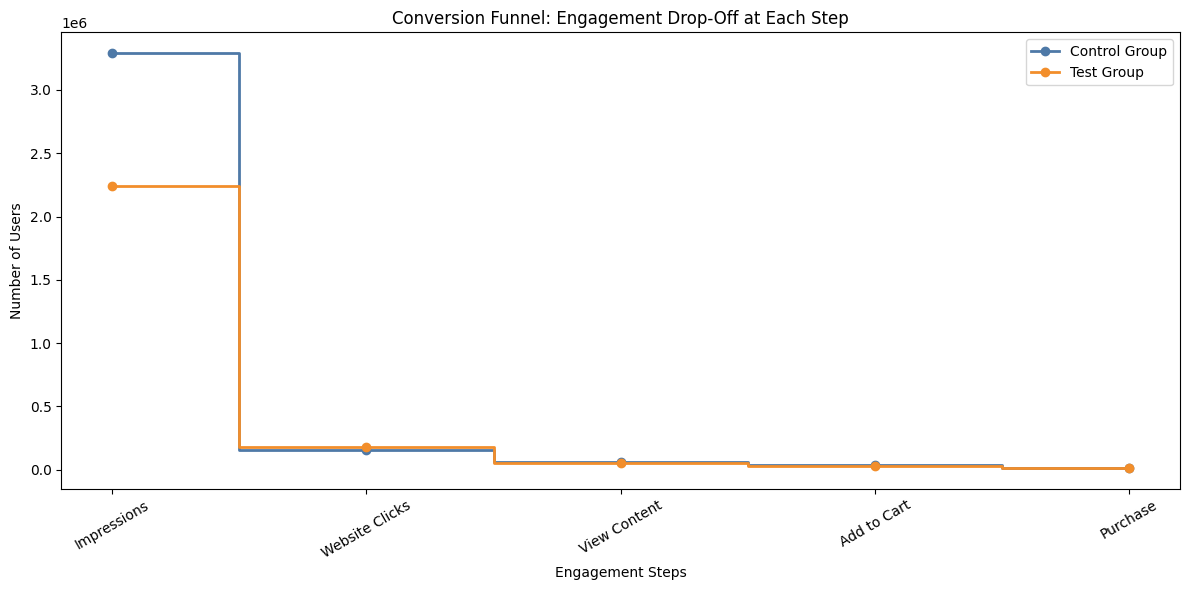

In [ ]:
# Plotting the funnel with clean labels
fig, ax = plt.subplots(figsize=(12, 6))
ax.step(funnel_steps, control_funnel, label='Control Group', color=control_color, marker='o', where='mid', linewidth=2, markersize=6)
ax.step(funnel_steps, test_funnel, label='Test Group', color=test_color, marker='o', where='mid', linewidth=2, markersize=6)
ax.set_title("Conversion Funnel: Engagement Drop-Off at Each Step")
ax.set_xlabel("Engagement Steps")
ax.set_ylabel("Number of Users")
ax.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Methodology and Results Summary

    Methodology:
        Data Collection: Analyzed user engagement metrics from Control and Test groups across impressions, website clicks, add-to-cart actions, and purchases.
        Metric Calculation: Computed Click-Through Rate (CTR) and Purchase Rate for each group to gauge user interaction and conversion.
        Statistical Analysis: Applied Chi-Square, Z-Test, and T-Test to evaluate the significance of differences in conversion rates between the Control and Test groups.
        Visualization: Created time series, bar charts, and a conversion funnel to illustrate spending patterns, CTR comparisons, and engagement drop-offs.

    Results:
        CTR: The Test group’s CTR was higher than the Control’s by a small margin, suggesting increased user interest at initial interaction stages.
        Purchase Rate: The Test group achieved a statistically significant increase in purchase rate, outperforming the Control group by approximately 47%.
        Conversion Funnel: The Test group maintained higher conversion rates across the funnel stages, especially from "Add to Cart" to "Purchase."
    